** Applying Linear regression (regular, ridge, and lasso), visualizing and comparing the results**

In [168]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

***Importing data from Boston dataset with columns ID, crim, Rooms,age,tax,prices etc ***

In [169]:
data = pd.read_csv("C:/Users/Ashwini/Desktop/STATS & ML/Boston_new.csv") # importing boston housing data

***Displaying first five records of dataset***

In [170]:
data.head() #displaying 1st five records

,ID,crim,zn,indus,chas,nox,Rooms,age,dis,rad,tax,ptratio,black,lstat,Prices
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


***Defining the target variable and predictors***

In [171]:
X = data.drop('Prices',axis=1)#predictor
Y = data['Prices']#target

***Splitting the dataset into 2 sets: Training set and Test set***

In [172]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)# splitting data into training and testing sets

## Regular linear regression

Linear regression is a linear approach for modelling the relationship between a dependent variable y and one or more explanatory variables (or independent variables) denoted X.Applying regular linear regression to boston data 

***Importing linear regression from sklearn***

In [173]:
from sklearn.linear_model import LinearRegression

***Fitting data into regular linear regression model & displaying the predicted Housing prices***

In [174]:
lm = LinearRegression()

lm.fit(X_train, Y_train)#fitting model

Y_pred = lm.predict(X_test)#predicting housing price values

Y_pred

array([ 25.61395024,   7.61026773,  22.94853771,  19.04697458,
        24.60917795,  26.04580419,   6.07167082,  29.51534848,
        35.87891104,  24.95300495,  41.47486948,   7.28216373,
        27.88465077,  19.52068242,  17.11921329,  33.91466126,
        29.75464312,  18.70005876,  26.82507861,  18.65192976,
        23.55405055,  17.3895998 ,  26.8212323 ,  32.38935632,
        31.88277924,  25.57424461,  16.38026494,   0.2948749 ,
        28.31898315,  42.48966914,  35.47593234,  30.11277957,
        43.2247869 ,  32.40947315,  25.01129513,  13.16456971,
        12.81353145,  20.63432984,  28.80112466,  18.60434654,
        11.61783072,  27.35775949,  10.31010304,  27.42989586,
        12.26470506,  24.66304835,  24.39457892,  17.91132623,
        33.07997507,  21.6565355 ,  34.56824096,  28.03909035,
        38.73781471,  10.81221433,  27.6064652 ,  24.63695824,
        11.20603191,  17.72729127,  39.05918945,  26.58432388,
        18.76194225,  26.41580117,  20.85387738,  27.64

***Calculating variance score of model fit***

In [193]:
from sklearn.metrics import explained_variance_score
print('Variance score::',explained_variance_score(Y_test,Y_pred))# calculating variance score

Variance score:: 0.730671801841


***Calculating the accuracy score of regular linear regression***

In [192]:
print('Accuracy score:',lm.score(X_test, Y_test))# calculating accuracy score of model fit

Accuracy score: 0.726538010537


***Calculating the mean squared error***

In [177]:
from sklearn import metrics
print('Mean squared Error MSE:', metrics.mean_squared_error(Y_test, Y_pred))# calculating MSE

Mean squared Error MSE: 21.4804083651


***Plotting predicted housing prices versus the number of rooms***

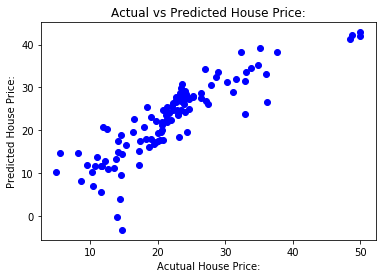

In [224]:
#plt.scatter(X_test['Rooms'], Y_test,color='b')
plt.scatter(Y_test,Y_pred, color='b')# plotting graph of predicted and actual house price
#plt.plot(X_train, lm.predict(X_train), color='blue')
#plt.plot(X_train,lm.predict(X_train))
plt.xlabel("Acutual House Price:")
plt.ylabel("Predicted House Price:")
plt.title("Actual vs Predicted House Price:")
plt.show()

## Lasso regression

Lasso(least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. Applying Lasso regression on boston data

***Importing Lasso linear regression from sklearn***

In [179]:
from sklearn.linear_model import LassoCV

**Fitting the data in lasso regression model and displaying the predicted housing prices**

In [212]:
ls = LassoCV()

ls.fit(X_train, Y_train)# fitting model

Y_pred = ls.predict(X_test) # calculating housing price values

Y_pred

array([ 23.62472227,  11.21019343,  22.45663981,  19.28170971,
        24.26436385,  25.84699818,  10.64511763,  23.68883391,
        33.33551334,  25.26684977,  40.04181544,   6.87620672,
        28.31270492,  18.6870572 ,  16.44328955,  33.98696603,
        27.04239665,  20.54392864,  26.39634588,  17.43996218,
        25.19842293,  19.6073092 ,  26.8807876 ,  31.36895002,
        30.48391851,  30.22058108,  21.28016476,   0.09893191,
        29.42921078,  38.20806951,  30.25843458,  29.80359204,
        39.63019626,  31.27579493,  26.23791898,  10.99528706,
        13.12298682,  20.02085453,  26.63240841,  19.00091394,
        12.93606421,  25.40857219,   9.15337119,  26.30020911,
        10.64581675,  24.02184603,  24.75883588,  18.14830838,
        31.62495623,  22.0624089 ,  28.43739481,  26.89655827,
        36.59363569,  11.61781795,  27.38586096,  25.35507112,
        11.92539708,  17.89879176,  32.39857674,  26.66722896,
        15.29629514,  28.04140897,  24.19333962,  27.45

***Calculating variance score of model fit***

In [213]:
#Y_test
from sklearn.metrics import explained_variance_score
print('Variance Score:',explained_variance_score(Y_test,Y_pred))# calculating variance score

Variance Score: 0.715748935198


***Calculating accuracy score of lasso linear regression***

In [214]:
print('Accuracy Score:',ls.score(X_test, Y_test))# calculating accuracy score

Accuracy Score: 0.714452998242


***Calculating the mean squared error***

In [215]:
from sklearn import metrics
print('Mean squared Error MSE:', metrics.mean_squared_error(Y_test, Y_pred))# calculating MSE

Mean squared Error MSE: 21.6338394408


***Plotting predicted housing prices versus the number of rooms***

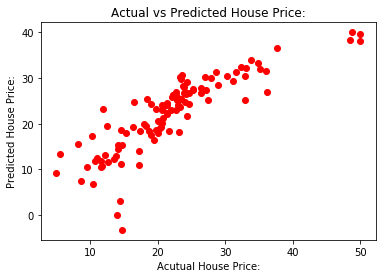

In [216]:
#plt.scatter(X_test['Rooms'], Y_test,color='r')
plt.scatter(Y_test,Y_pred, color='r')# plotting graph of actual and predicted housing prices
#plt.scatter(X_train['Rooms'], Y_train,color='r')
#plt.plot(X_train,lm.predict(X_train))
plt.xlabel("Acutual House Price:")
plt.ylabel("Predicted House Price:")
plt.title("Actual vs Predicted House Price:")
plt.show()

## Ridge regression

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity.Applying ridge regression on boston data

***Importing Ridge linear regression from sklearn***

In [217]:
from sklearn.linear_model import Ridge

***Fitting the data in Ridge regression model and displaying the predicted housing prices***

In [218]:
lr = Ridge()

lr.fit(X_train, Y_train)# fitting model

Y_pred = lr.predict(X_test) #predicting housing price values

Y_pred

array([ 24.64456048,   9.54292974,  22.49227051,  19.53448542,
        24.85222064,  25.63472568,   5.46071924,  28.65777654,
        35.28806511,  24.70522461,  42.19658978,   7.01342468,
        27.9319452 ,  18.89344098,  16.68197987,  34.61988049,
        29.18747865,  19.44077351,  26.27858506,  17.97337436,
        23.86826928,  17.82343855,  26.6490564 ,  31.96482516,
        31.31821892,  28.00631243,  17.66081578,  -0.31674184,
        28.98442863,  42.00330162,  34.36773421,  29.88626776,
        42.85989337,  32.37173154,  24.5951979 ,  11.9474929 ,
        12.86876714,  20.77476758,  28.36423261,  17.58572724,
        13.33279644,  26.90272251,  10.29449432,  27.02899873,
        11.89447563,  24.0196885 ,  24.12767008,  18.29851499,
        33.18953338,  21.96480482,  33.6548948 ,  27.77013993,
        38.33759165,  10.88923298,  27.76514861,  24.67592978,
        11.69770788,  17.37470967,  38.22157503,  26.1668713 ,
        17.47706756,  26.975969  ,  21.93572825,  26.79

***Calculating variance score of model fit***

In [219]:
#Y_test
from sklearn.metrics import explained_variance_score
print('Variance Score:', explained_variance_score(Y_test,Y_pred))# calculating variance score

Variance Score: 0.730671801841


***Calculating accuracy score of Ridge linear regression***

In [223]:
print('Accuracy score:',lr.score(X_test, Y_test))# calculating accuracy score

Accuracy score: 0.726538010537


***Calculating the mean squared error***

In [221]:
from sklearn import metrics
print('Mean squared Error MSE:', metrics.mean_squared_error(Y_test, Y_pred))# calculating MSE

Mean squared Error MSE: 20.7182451113


***Plotting predicted housing prices versus the number of rooms***

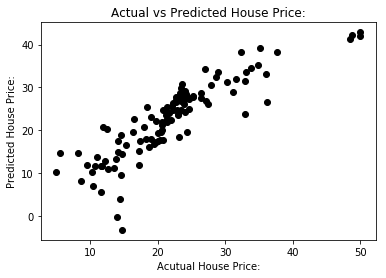

In [222]:
plt.scatter(Y_test,Y_pred, color='black')# plotting actual and predicted housing prices
plt.xlabel("Acutual House Price:") 
plt.ylabel("Predicted House Price:")
plt.title("Actual vs Predicted House Price:")
plt.show()

Conclusion on comparision of all three models:

**Accuracy of ridge regression model is greater than the remaining two model fit accuracies.Also, means square error of the ridge regression is less ; Hence it can be concluded that Ridge regression is the best fit for the selected boston housing data**

References:

**http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html**
**http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html**
**http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html**